In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv('job_applicants.csv')

# Drop irrelevant columns
df = df.drop(['S.No', 'Job Applicant Name'], axis=1)

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'Race', 'Ethnicity', 'Resume', 'Job Roles', 'Job Description'])

# Define the feature columns (X) and target (y)
X = df.drop('Best Match', axis=1)
y = df['Best Match']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the numerical features (e.g., Age)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Age']])
X_test_scaled = scaler.transform(X_test[['Age']])

# Replace the 'Age' column in X_train and X_test with the scaled version
X_train['Age'] = X_train_scaled
X_test['Age'] = X_test_scaled


In [2]:
df.columns

Index(['Age', 'Best Match', 'Gender_Female', 'Gender_Male', 'Race_Australoid',
       'Race_Mongoloid/Asian', 'Race_Negroid/Black', 'Race_White/Caucasian',
       'Ethnicity_Asian', 'Ethnicity_Black',
       ...
       'Job Description_Collects and analyzes datasets for insights.',
       'Job Description_Creates visual content to communicate messages.',
       'Job Description_Designs and manages computer networks.',
       'Job Description_Designs and tests computer hardware components.',
       'Job Description_Develops and implements marketing strategies.',
       'Job Description_Helps individuals achieve health and fitness goals.',
       'Job Description_Oversees hotel operations ensuring guest satisfaction.',
       'Job Description_Oversees projects ensuring they are completed on time and within budget.',
       'Job Description_Responsible for designing and maintaining software applications.',
       'Job Description_Studies political systems and public policies.'],
      dty

In [3]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1900
           1       0.82      0.78      0.80      1100

    accuracy                           0.86      3000
   macro avg       0.85      0.84      0.84      3000
weighted avg       0.86      0.86      0.86      3000

Accuracy: 0.8563333333333333
Confusion Matrix:
 [[1713  187]
 [ 244  856]]


In [4]:
df.columns

Index(['Age', 'Best Match', 'Gender_Female', 'Gender_Male', 'Race_Australoid',
       'Race_Mongoloid/Asian', 'Race_Negroid/Black', 'Race_White/Caucasian',
       'Ethnicity_Asian', 'Ethnicity_Black',
       ...
       'Job Description_Collects and analyzes datasets for insights.',
       'Job Description_Creates visual content to communicate messages.',
       'Job Description_Designs and manages computer networks.',
       'Job Description_Designs and tests computer hardware components.',
       'Job Description_Develops and implements marketing strategies.',
       'Job Description_Helps individuals achieve health and fitness goals.',
       'Job Description_Oversees hotel operations ensuring guest satisfaction.',
       'Job Description_Oversees projects ensuring they are completed on time and within budget.',
       'Job Description_Responsible for designing and maintaining software applications.',
       'Job Description_Studies political systems and public policies.'],
      dty

In [5]:
# Check performance by Gender
gender_columns = ['Gender_Male', 'Gender_Female']  # Adjust according to your encoding

# Calculate metrics by gender group
for gender in gender_columns:
    group = X_test[X_test[gender] == 1]
    y_group = y_test[X_test[gender] == 1]
    y_pred_group = y_pred[X_test[gender] == 1]
    
    accuracy_group = accuracy_score(y_group, y_pred_group)
    print(f"Accuracy for {gender}: {accuracy_group}")
    
    # Optionally, you can calculate false positive rate, false negative rate, etc. for each group


Accuracy for Gender_Male: 0.8463010204081632
Accuracy for Gender_Female: 0.86731843575419


In [6]:
# Check performance by Gender
race_columns = ['Race_Mongoloid/Asian',
       'Race_Negroid/Black', 'Race_White/Caucasian', 'Ethnicity_Black',
       'Ethnicity_Hispanic', 'Ethnicity_Latino', 'Ethnicity_Middle Eastern',
       'Ethnicity_Mixed', 'Ethnicity_Native American', 'Ethnicity_Other',
       'Ethnicity_Pacific Islander', 'Ethnicity_White']  

# Calculate metrics by gender group
for race in race_columns:
    group = X_test[X_test[race] == 1]
    y_group = y_test[X_test[race] == 1]
    y_pred_group = y_pred[X_test[race] == 1]
    
    accuracy_group = accuracy_score(y_group, y_pred_group)
    print(f"Accuracy for {race}: {accuracy_group}")
    
    # Optionally, you can calculate false positive rate, false negative rate, etc. for each group

Accuracy for Race_Mongoloid/Asian: 0.870063694267516
Accuracy for Race_Negroid/Black: 0.8011049723756906
Accuracy for Race_White/Caucasian: 0.8729729729729729
Accuracy for Ethnicity_Black: 0.846875
Accuracy for Ethnicity_Hispanic: 0.8161290322580645
Accuracy for Ethnicity_Latino: 0.8683385579937304
Accuracy for Ethnicity_Middle Eastern: 0.8645833333333334
Accuracy for Ethnicity_Mixed: 0.8957654723127035
Accuracy for Ethnicity_Native American: 0.8846153846153846
Accuracy for Ethnicity_Other: 0.8758169934640523
Accuracy for Ethnicity_Pacific Islander: 0.8768115942028986
Accuracy for Ethnicity_White: 0.8528428093645485


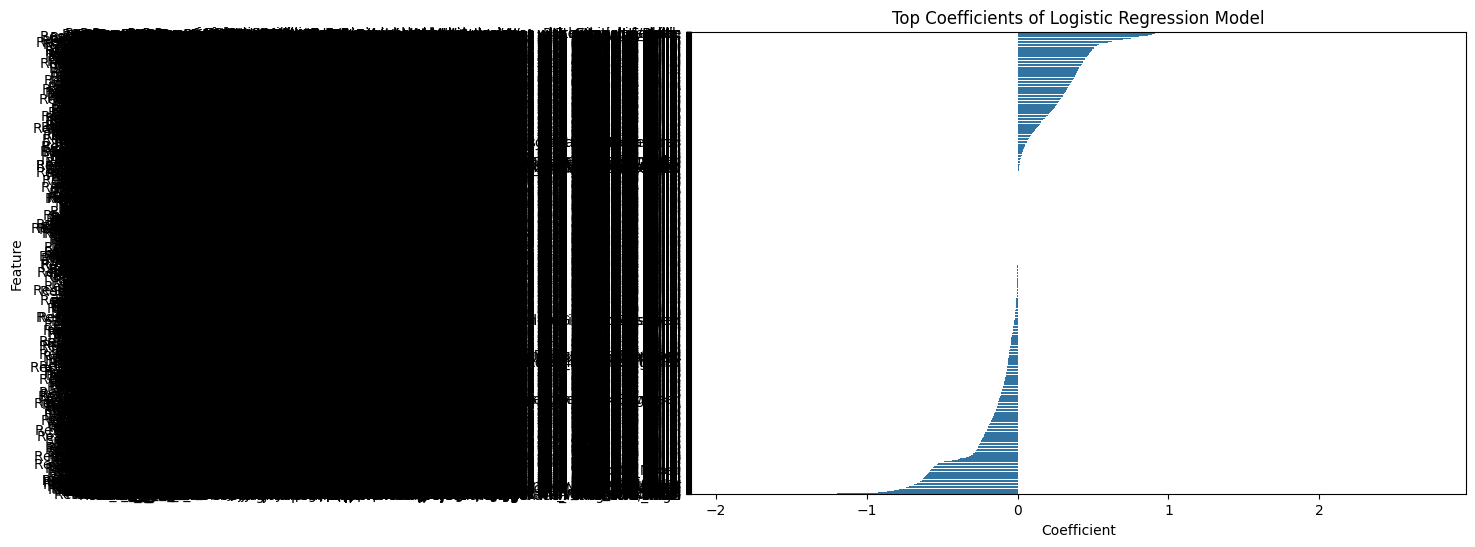

In [7]:
# Get model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort coefficients in descending order
sorted_coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plot top coefficients
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=sorted_coefficients)
plt.title("Top Coefficients of Logistic Regression Model")
plt.show()


In [8]:
# Race and Ethnicity Bias Evaluation
race_columns = ['Race_Australoid', 'Race_White/Caucasian', 'Race_Mongoloid/Asian', 'Race_Negroid/Black']  # Adjust accordingly
ethnicity_columns = ['Ethnicity_Black', 'Ethnicity_Hispanic', 'Ethnicity_Pacific Islander', 'Ethnicity_Asian']  # Adjust accordingly

# Evaluate performance by Race
for race in race_columns:
    group = X_test[X_test[race] == 1]
    y_group = y_test[X_test[race] == 1]
    y_pred_group = y_pred[X_test[race] == 1]
    
    accuracy_group = accuracy_score(y_group, y_pred_group)
    print(f"Accuracy for {race}: {accuracy_group}")
    
# Evaluate performance by Ethnicity (similarly)
for ethnicity in ethnicity_columns:
    group = X_test[X_test[ethnicity] == 1]
    y_group = y_test[X_test[ethnicity] == 1]
    y_pred_group = y_pred[X_test[ethnicity] == 1]
    
    accuracy_group = accuracy_score(y_group, y_pred_group)
    print(f"Accuracy for {ethnicity}: {accuracy_group}")


Accuracy for Race_Australoid: 0.8788282290279628
Accuracy for Race_White/Caucasian: 0.8729729729729729
Accuracy for Race_Mongoloid/Asian: 0.870063694267516
Accuracy for Race_Negroid/Black: 0.8011049723756906
Accuracy for Ethnicity_Black: 0.846875
Accuracy for Ethnicity_Hispanic: 0.8161290322580645
Accuracy for Ethnicity_Pacific Islander: 0.8768115942028986
Accuracy for Ethnicity_Asian: 0.7820069204152249


In [9]:
from fairlearn.metrics import MetricFrame, false_positive_rate, false_negative_rate
import pandas as pd

# Define the sensitive features: Race and Ethnicity columns
sensitive_features_race = df[['Race_Australoid', 'Race_White/Caucasian', 'Race_Mongoloid/Asian', 'Race_Negroid/Black']]
sensitive_features_ethnicity = df[['Ethnicity_Black', 'Ethnicity_Hispanic', 'Ethnicity_Pacific Islander', 'Ethnicity_Asian']]

# Combine the race and ethnicity sensitive features into one DataFrame for both sensitive feature sets
sensitive_features_combined = pd.concat([sensitive_features_race, sensitive_features_ethnicity], axis=1)

# Match indices to X_test
sensitive_features_test = sensitive_features_combined.iloc[X_test.index]

# Compute Fairlearn metrics for Race and Ethnicity combined
metric_frame = MetricFrame(
    metrics={"accuracy": accuracy_score,
             "false_positive_rate": false_positive_rate,
             "false_negative_rate": false_negative_rate},
    y_true=y_test,  # Correct y_true to be y_test
    y_pred=y_pred,  # Ensure this is the prediction from X_test
    sensitive_features=sensitive_features_test  # Combined sensitive features for Race and Ethnicity
)

# Print the results
print("Fairlearn Metrics by Race and Ethnicity:")
print(metric_frame)


Fairlearn Metrics by Race and Ethnicity:
